# fmu.sumo.explorer

Package for browsing cases and surfaces in Sumo.

1. [Explorer](#class-explorer)
    1. [get_fields]()
    2. [get_users]()
    3. [get_status]()
    4. [get_cases]()
2. [CaseCollection]()
3. [Case]()
    1. [get_object_types]()
    2. [get_iterations]()
    3. [get_realizations]()
    4. [get_surface_names]()
    5. [get_surface_tag_names]()
    6. [get_surface_aggregations]()
    7. [get_surfaces]()
4. [SurfaceCollection]()
    1. [aggregate]()
5. [Surface]()

In [2]:
from fmu.sumo.explorer import Explorer
import xtgeo
from io import BytesIO
%matplotlib inline

2022-03-15 13:15:01 INFO     Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-03-15 13:15:01 INFO     NumExpr defaulting to 8 threads.


## Class: Explorer
Search for cases in SUMO

Methods:
- get_fields()
- get_users()
- get_status()
- get_cases()

In [3]:
sumo = Explorer(env="dev", write_back=True)

2022-03-15 13:15:17 DEBUG    Initialize Auth
2022-03-15 13:15:17 DEBUG    client_id is 1826bd7c-582f-4838-880d-5b4da5c3eea2
2022-03-15 13:15:17 DEBUG    client_id is 1826bd7c-582f-4838-880d-5b4da5c3eea2
2022-03-15 13:15:17 DEBUG    self.writeback is True
2022-03-15 13:15:17 DEBUG    _get_cache
2022-03-15 13:15:17 DEBUG    cache is available
2022-03-15 13:15:17 DEBUG    cache is available, reading it
2022-03-15 13:15:17 DEBUG    Reading from /Users/adnejacobsen/.sumo/88d2b022-3539-4dda-9e66-853801334a86.token
2022-03-15 13:15:17 DEBUG    self.app has been initialized
2022-03-15 13:15:17 DEBUG    Getting accounts
2022-03-15 13:15:17 DEBUG    self.accounts is [{'home_account_id': '7d857070-b26b-423d-8eb0-b5dac0400a17.3aa4a235-b6e2-48d5-9195-7fcf05b459b0', 'environment': 'login.microsoftonline.com', 'username': 'ADNJ@equinor.com', 'authority_type': 'MSSTS', 'local_account_id': '7d857070-b26b-423d-8eb0-b5dac0400a17', 'realm': '3aa4a235-b6e2-48d5-9195-7fcf05b459b0'}]
2022-03-15 13:15:17 DEBU

### Explorer.get_fields()

Returns:

```
Dict
{
    FIELD_NAME: CASE_COUNT
}
```

In [3]:
fields = sumo.get_fields()

print(fields)

2022-03-03 12:32:50 DEBUG    is_token_expired() is starting
2022-03-03 12:32:50 DEBUG    is_expired: False


{'JOHAN SVERDRUP': 8}


### Explorer.get_users()

Returns:

```
Dict
{
    USER_NAME: CASE_COUNT
}
```

In [4]:
users = sumo.get_users()

print(users)

2022-03-03 12:32:51 DEBUG    is_token_expired() is starting
2022-03-03 12:32:51 DEBUG    is_expired: False


{'peesv': 6, 'gmcq': 1, 'jsorb': 1}


### Explorer.get_status()

Returns:

`Dict`

```
{
    STATUS: CASE_COUNT
}
```

In [5]:
status = sumo.get_status()

print(status)

2022-03-03 12:32:51 DEBUG    is_token_expired() is starting
2022-03-03 12:32:51 DEBUG    is_expired: False


{'official': 3, 'scratch': 3, 'keep': 2}


### Explorer.get_cases()

Params:
- status: string[] 
- fields: string[]
- users: string[]

Returns: `CaseCollection`

In [4]:
my_cases = sumo.get_cases(
    status=["keep", "official"],
    fields=["JOHAN SVERDRUP"],
    users=["peesv"]
)

print(len(my_cases))

2022-03-15 13:15:33 DEBUG    is_token_expired() is starting
2022-03-15 13:15:33 DEBUG    is_expired: False


1


## Class: CaseCollection

A set of case results. Inherits from collections.Sequence and acts as a list of `Case` objects.

In [5]:
my_case = my_cases[0]
print(my_case.case_name)

for c in my_cases[1:3]:
    print(c.case_name)

2022-03-15 13:15:37 DEBUG    is_token_expired() is starting
2022-03-15 13:15:37 DEBUG    is_expired: False
2022-03-15 13:15:37 DEBUG    is_token_expired() is starting
2022-03-15 13:15:37 DEBUG    is_expired: False


2022a_b011p2p0_komodo_rc4


## Class: Case

Represents a case in Sumo and has methods for finding surfaces belonging to the case.

Some of the case meta data is accessible as attributes, the rest can be extracted from `Case.meta_data`.

Attributes:
- meta_data: dict
- sumo_id: uuid
- fmu_id: uuid
- case_name: string
- field_name: string
- status: string
- user: string

Methods:
- get_object_types()
- get_iterations()
- get_realizations()
- get_surface_names()
- get_surface_tag_names()
- get_surface_aggregations()
- get_surfaces()

Raw metadata object can be accessed at `Case.meta_data`

In [8]:
# Some case info as attributes
print(my_case.sumo_id)
print(my_case.fmu_id)
print(my_case.case_name)
print(my_case.field_name)
print(my_case.status)
print(my_case.user)

0005976b-6e0c-68a4-63bc-fa6e5c74e111
0ccb40f6-3103-4f67-8cf2-6fdb1cd4ebd6
2021a_b010p4p1_tstdata_rep_2021-09-06_n20
JOHAN SVERDRUP
official
peesv


### Case.get_object_types()

Returns:
```
Dict
{
    OBJECT_NAME: OBJECT_COUNT
}
```

In [9]:
object_types = my_case.get_object_types()

print(object_types)

2022-03-03 12:32:52 DEBUG    is_token_expired() is starting
2022-03-03 12:32:52 DEBUG    is_expired: False


{'surface': 2203, 'polygons': 133, 'table': 95}


### Case.get_iterations()

Returns:
```
Dict
{
    ITERATION_ID: OBJECT_COUNT
}
```

In [10]:
iterations = my_case.get_iterations()

print(iterations)

2022-03-03 12:32:52 DEBUG    is_token_expired() is starting
2022-03-03 12:32:52 DEBUG    is_expired: False


{0: 2431}


### Case.get_realizations()

Params:
- iteration_id: number

Returns:
```
Dict
{
    REALIZATION_ID: OBJECT_COUNT
}
```

In [11]:
realizations = my_case.get_realizations(iteration_id=0)

print(realizations)

2022-03-03 12:32:53 DEBUG    is_token_expired() is starting
2022-03-03 12:32:53 DEBUG    is_expired: False


{0: 105, 1: 105, 2: 105, 3: 105, 4: 105, 5: 105, 6: 105, 7: 105, 8: 105, 9: 105, 11: 105, 12: 105, 13: 105, 14: 105, 15: 105, 16: 105, 17: 105, 18: 105, 19: 105}


### Case.get_surface_names()

Params:
- iteration_id: number
- realization_id: number
- aggregation: string

Returns:
```
Dict
{
    SURFACE_NAME: COUNT
}
```

In [6]:
surface_names = my_case.get_surface_names(
    iteration_id=0, 
    realization_id=0,
    #aggregation="MEAN"
)

print(surface_names)

2022-03-15 13:15:49 DEBUG    is_token_expired() is starting
2022-03-15 13:15:49 DEBUG    is_expired: False


{'Eiriksson Fm. 2.2 JS': 12, 'Draupne Fm. 1 JS': 6, 'Draupne Fm. 2 JS': 6, 'Eiriksson Fm. 1 JS': 6, 'Eiriksson Fm. 2.1 JS': 6, 'Halibut Bank Fm. 1 JS': 6, 'Halibut Bank Fm. 2 JS': 6, 'Skagerrak Fm.': 6, 'Turbot Bank Fm. 1 JS': 6, 'VESTLAND GP.': 6, 'Totals': 5, 'Aasgard Fm. Top': 3, 'Intra-Upper Triassic Unconformity': 3, 'VIKING GP. Top': 3, 'Draupne Fm. 1 JS Top': 2, 'Halibut Bank Fm. 2 JS Base': 2, 'SHETLAND GP. Top': 2, 'Turbot Bank Fm. 1 JS Top': 2, 'ZECHSTEIN GP. Top': 2, 'Aasgard Fm.': 1, 'BCU_IUTU': 1, 'Balder Fm. Top': 1, 'Basement Base': 1, 'Blodoeks Fm. Top': 1, 'CROMER KNOLL GP. Top': 1, 'CROMER_KNOLL_GP_Top_Aasgard_Fm_Top': 1, 'Eiriksson Fm. 1 JS Top': 1, 'Eiriksson Fm. 2 JS Top': 1, 'Eiriksson Fm. 2. JS': 1, 'Eiriksson Fm. 2.1 JS Top': 1, 'Eiriksson Fm. 2.2 JS Top': 1, 'HEGRE GP. Top': 1, 'HO Late Oligocene Un. Base': 1, 'HO Late Oligocene Un. Top': 1, 'Halibut Bank Fm. 2 JS Top': 1, 'Halibut_Bank_Fm_Base_Basement_Base': 1, 'Hod Fm. Top': 1, 'Lista Fm. Top': 1, 'NORDLAND 

### Case.get_surface_tag_names()

Params:
- surface_name: string
- iteration_id: number
- realization_id: number
- aggregation: string

Returns:

```
Dict
{
    TAG_NAME: COUNT
}
```


In [7]:
tag_names = my_case.get_surface_tag_names(
    surface_name="VIKING GP. Top", 
    iteration_id=0, 
    realization_id=0,
    #aggregation="MEAN"
)

print(tag_names)

2022-03-15 13:16:49 DEBUG    is_token_expired() is starting
2022-03-15 13:16:49 DEBUG    is_expired: False


{'depth_depth_conversion': 1, 'structural_model': 1, 'velocity_structural_model': 1}


### Case.get_surfaces()

Params:
- surface_name: string
- tag_name: string
- iteration_id: number
- realization_id: number
- aggregation: string

Returns:
`Surface[]`

In [9]:
# Get a surface object from specific realization
surfaces = my_case.get_surfaces(
    surface_name="VIKING GP. Top",
    tag_name="structural_model",
    iteration_id=0,
    #realization_id=0
)

s = surfaces[0]

print(s.name)
print(s.tag_name)

2022-03-15 13:17:14 DEBUG    is_token_expired() is starting
2022-03-15 13:17:14 DEBUG    is_expired: False
2022-03-15 13:17:14 DEBUG    is_token_expired() is starting
2022-03-15 13:17:14 DEBUG    is_expired: False


VIKING GP. Top
structural_model


In [10]:
# Get all versions of surface object (1 from each realization) for a specified iteration
surfaces = my_case.get_surfaces(
    surface_name="VIKING GP. Top",
    tag_name="structural_model",
    iteration_id=0
)

print(len(surfaces))

2022-03-15 13:17:19 DEBUG    is_token_expired() is starting
2022-03-15 13:17:19 DEBUG    is_expired: False


198


## Class: SurfaceCollection

A set of surface results. Inherits from collections.Sequence and acts as a list of `Surface` objects.

methods:
- aggregate()

In [11]:
my_surface = surfaces[0]
print(my_surface.name)
print(my_surface.iteration_id)

for s in surfaces[1:3]:
    print(s.name)
    print(s.realization_id)

2022-03-15 13:17:24 DEBUG    is_token_expired() is starting
2022-03-15 13:17:24 DEBUG    is_expired: False
2022-03-15 13:17:25 DEBUG    is_token_expired() is starting
2022-03-15 13:17:25 DEBUG    is_expired: False


VIKING GP. Top
0
VIKING GP. Top
195
VIKING GP. Top
113


### SurfaceCollection.aggregate()

Params:
- operations: string || string[]

Returns: blob if one operation is provided, dictionary of blobs if multiple operations:
```
Dict
{
    OPERATION: BLOB
}
```

In [12]:
surfaces = my_case.get_surfaces(
    surface_name="VIKING GP. Top",
    tag_name="structural_model",
    iteration_id=0
)

# One operation
mean = surfaces.aggregate("MEAN")

# Multiple
#aggs = surfaces.aggregate(["MEAN", "MIN", "MAX"])
#mean = aggs["MEAN"]

2022-03-15 13:17:36 DEBUG    is_token_expired() is starting
2022-03-15 13:17:36 DEBUG    is_expired: False
2022-03-15 13:17:37 DEBUG    is_token_expired() is starting
2022-03-15 13:17:37 DEBUG    is_expired: False
2022-03-15 13:17:39 DEBUG    is_token_expired() is starting
2022-03-15 13:17:39 DEBUG    is_expired: False


2022-03-15 13:18:33 INFO     Ran init of xtgeo.common.sys, ID is 5188901200
2022-03-15 13:18:33 INFO     Checking file...
2022-03-15 13:18:33 INFO     Signature is irap binary
2022-03-15 13:18:33 INFO     Enter function xtgeo.surface._regsurf_import
2022-03-15 13:18:33 INFO     Start __init__ method for RegularSurface object 5185405648
2022-03-15 13:18:33 INFO     xtgeo.plot.xtmap.Map
2022-03-15 13:18:33 INFO     Ran __init__ ...
2022-03-15 13:18:33 INFO     xtgeo.plot.xtmap.Map
2022-03-15 13:18:33 INFO     Infotext is <None>
2022-03-15 13:18:33 INFO     Definition of a colormap from string name: rainbow
2022-03-15 13:18:33 INFO     Defining colormap
2022-03-15 13:18:33 INFO     Valid color maps: ['Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Set1', 'Set2', 'Set3', 'Spectral', 'Wis

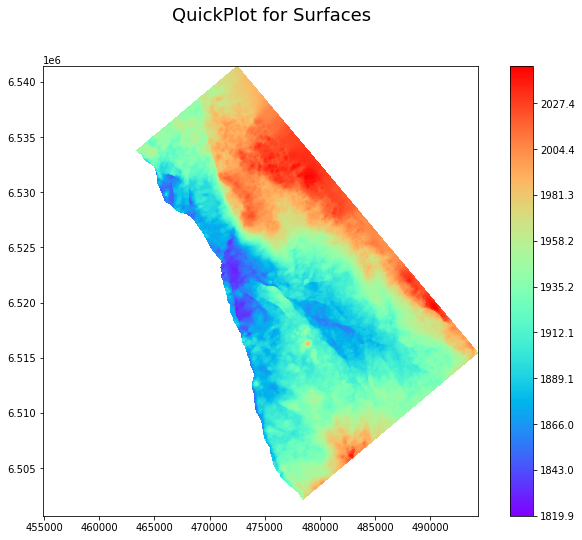

In [13]:
bytestring = BytesIO(mean)
xtgeo_surface = xtgeo.surface_from_file(bytestring)
xtgeo_surface.quickplot()

## Class: Surface
Represents a surface in Sumo. 

Some of the surface meta data is accessible as attributes, the rest can be extracted from `Surface.meta_data`

Attributes:
- blob: blob
- meta_data: dict
- sumo_id:uuid
- iteration_id: number
- realization_id: number
- name: string
- relative_path: string
- full_path: string
- aggregation:

In [ ]:
s = surfaces[0]

# Get meta_data and blob
meta_data = s.meta_data
blob = s.blob

# Get data from meta_data attribute
file_path = meta_data["file"]["relative_path"]

# Or use attribute
file_path = s.relative_path

## Example: process of finding a surface from case


In [ ]:
my_case = sumo.get_case_by_id("69852e8a-b230-d341-e0de-bf61b1308f2b")

# Get iteration
iterations = my_case.get_iterations()

i = list(iterations.keys())[0]


# Get realization
realizations = my_case.get_realizations(
    iteration_id=i
)

r = list(realizations.keys())[0]


# Get surface name
surface_names = my_case.get_surface_names(
    iteration_id=i,
    realization_id=r
)

s = list(surface_names.keys())[0]


# Get tag names
tag_names = my_case.get_surface_tag_names(
    surface_name=s,
    iteration_id=i,
    realization_id=r
)

t = list(tag_names.keys())[0]


# Get surface
surfaces = my_case.get_surfaces(
    surface_name=s,
    tag_name=t,
    iteration_id=i,
    realization_id=r
)

s = surfaces[0]

# Visualize with xtgeo
bytestring = BytesIO(s.blob)
xtgeo_surface = xtgeo.surface_from_file(bytestring)
xtgeo_surface.quickplot()

# Print info
print(f"Case: {my_case.case_name}")
print(f"Iteration: {i}")
print(f"Realization: {r}")
print(f"Surface name: {s}")
print(f"Content type: {t}")